# Marketing Data Analysis (Banking)

# **1. Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import statsmodels.api as sm
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

# **2. Read data**

In [4]:
## This will show current working diractory
os.getcwd()

'C:\\Users\\Dell'

In [10]:
# Read the data from cvs into a Pandas DataFrame
data= pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### **About this data** 

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution. 

Input variables:
- Age (Age of customer)
- Job (Job of customer)
- Martial (Martial status of customer)
- Education (Customer education level)
- Defaul (Has credit in default?)
- Housing (If costumer has housing loan)
- Loan	  (Has Personal Loan)
- Balance (Customer's individual balance)
- Contact (Communication type)
- Month	   (Last contact month of year)
- Day	   (Last contact day of the week)
- Duration	(Last contact duration, in seconds,this attribute highly affects the output target (e.g., if duration=0 theny='no')
- Campaign	(Number of contacts performed during this campaign and for this client)
- Pdays	    (Number of days that passed by after the client was last contacted from a previous campaign)
- Previous	(Number of contacts performed before this campaign and for this client)
- Poutcome	(outcome of the previous marketing campaign)
- Deposit	(has the client subscribed a term deposit (binary: 'yes','no')

### Objective: 
Analyze data in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# **3. Data review and checks**

In [11]:
data0 = data.copy()
print(data0.shape)

(11162, 17)


- This dataset has rows=11162 and columns=17

In [12]:
# Check data types in this dateset
numeric_col= list(data0.select_dtypes(np.number))
print(numeric_col)
print(len(numeric_col))
categorical_col= list(data0.select_dtypes(include= 'object'))
print((categorical_col))
print(len(categorical_col))

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
7
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
10


In [13]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
# Handling duplicate values
data0.duplicated().sum()

0

- Thare is no duplicate values in this dataset

## **3.1 Descriptive Statistics**

Descriptive statistics are used to describe or summarize the characteristics of a sample or data set, such as a variable's mean, standard deviation, or median. 

In [15]:
data0.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


#### Below conclusion can be done based on data summary:

- Maximum age is 95 and minimum age is 18. 


- Minimum account balance of customer is in negative and maximum balance is 81204.


- Maximum number of contacts performed during this campaign for perticular customer is 63 and minimum contact is 1.


- Maximum number of days that passed by after the client was last contacted from a previous campaign is 854.


- Number of contacts performed before this campaign for customer maximum is 58 and minimum is 0.


## 3.2 Null Check

In [16]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

- There is no missing value present in data.

- If missing values are present, we can handle missing values by dropping the missing records or by imputing the values.

#### If missing values present in the data
- First Outlier Treatment and then Missing Data Imputation because the outliers will also influence the missing data algorithms in a negative manner.

## 3.3 Handling Outliers

There are two type of outliers

Univariate Outliers: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.

Multivariate Outliers: While ploting data, some values of one variable may not the beyond the expected range, but when you plot the datawith some other variable, these values may be lie far from the expected value.

### Outliers for age

In [17]:
## check the skewness of the data
data1= data0.copy()
data1.skew().sort_values()

day         0.111330
age         0.862780
duration    2.143695
pdays       2.449986
campaign    5.545578
previous    7.335298
balance     8.224619
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

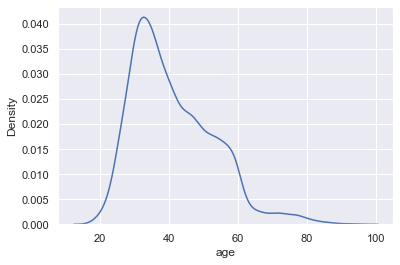

In [18]:
sns.kdeplot(data1['age'])

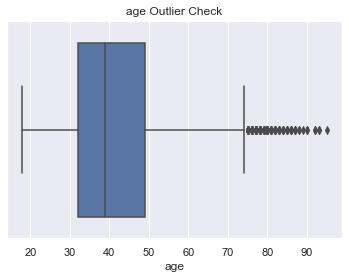

In [19]:
sns.boxplot(x=data1['age'])
plt.title('age Outlier Check')
plt.show()

In [20]:
Qntl1 = data1['age'].quantile(0.25)  ## 25% of the customers have age less than Qntl1
Qntl3 = data1['age'].quantile(0.75)  ## 75% of the customers have age less than Qntl3
IQR = Qntl3 - Qntl1
lw= Qntl1 - 1.5* IQR
up = Qntl3 + 1.5* IQR

In [21]:
print("Outlier percentage in Age:",((data1[data1['age']>up].shape[0]+ data1[data1['age']<lw].shape[0])/data1.shape[0])*100)

Outlier percentage in Age: 1.5319835154990145


- In this dataset age outliers percentage is 1.53%. So we can replace this data by upper bound limit.

In [22]:
## customers age more than upper bound are replaced with upper bound age
data1['age'] = np.where(data1['age']> up, up, data1['age'])
## customers age less than lower bound are replaced with lower bound age
data1['age'] = np.where(data1['age']< lw, lw, data1['age'])

6.5 74.5


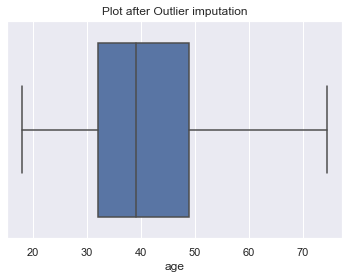

In [23]:
# After outliers imputation 
print(lw, up)
sns.boxplot(x=data1['age'])
plt.title('Plot after Outlier imputation')
plt.show()

- By the analyzing of age column, we found that minimum age of customers is 18 and maximum age is 95.


- We replace maximum  age by upper bound of age (74.5), age between 18 to 74.5 is valid range to target customer for loan.

### Outliers for balance¶

<AxesSubplot:xlabel='balance', ylabel='Density'>

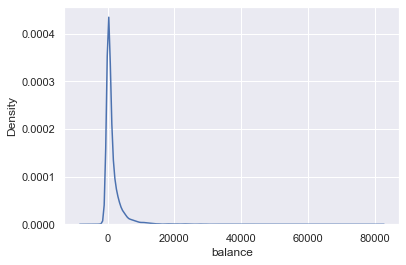

In [24]:
sns.kdeplot(data1['balance'])

In [25]:
print("Maximum balance:" ,data1['balance'].max())
print("Minimum balance:d" ,data1['balance'].min())
print("Negative balance: ", len(data1[data1['balance']<0])/len(data1))

Maximum balance: 81204
Minimum balance:d -6847
Negative balance:  0.061637699337036375


- By the analyzing of balance column, we find that minimum account balance of customers is -6847 and maximum balance is 81204. And this is valid range so, balance column does not have outliers.


- Almost 6% customers have negative balance is an indicator that some customers have a loan account.

### Outliers for campaign

<AxesSubplot:xlabel='campaign', ylabel='Density'>

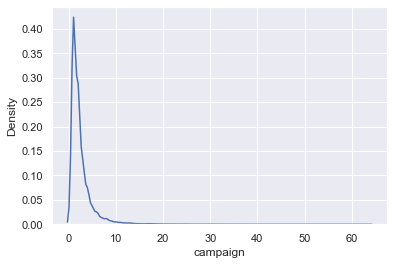

In [26]:
sns.kdeplot(data1['campaign'])

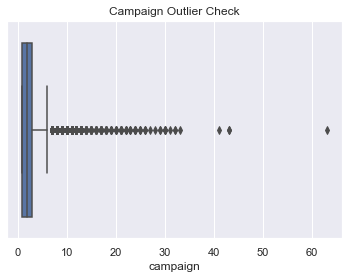

In [27]:
sns.boxplot(x=data1['campaign'])
plt.title('Campaign Outlier Check')
plt.show()

In [28]:
Qntl1 = data1['campaign'].quantile(0.25)  
Qntl3 = data1['campaign'].quantile(0.75)  
IQR = Qntl3 - Qntl1
lw = Qntl3 - 1.5* IQR
up = Qntl3 + 1.5* IQR
## customers campaign more than upper bound are replaced with upper bound campaign
data1['campaign'] = np.where(data1['campaign']> up, up, data1['campaign'])


0.0 6.0


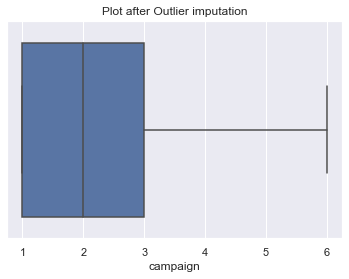

In [29]:
# After outliers imputation 
print(lw, up)
sns.boxplot(x=data1['campaign'])
plt.title('Plot after Outlier imputation')
plt.show()

- By the analyzing box plot, we can find that in this campaign contact a particular customer for maximum 6 time and minimum 0 time.


### Outlier for pdays

<AxesSubplot:xlabel='pdays', ylabel='Density'>

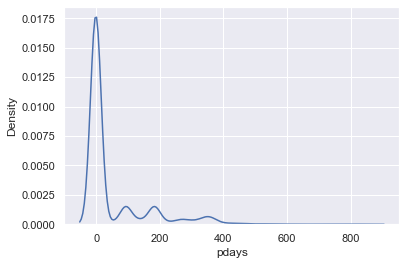

In [30]:
sns.kdeplot(data1['pdays'])

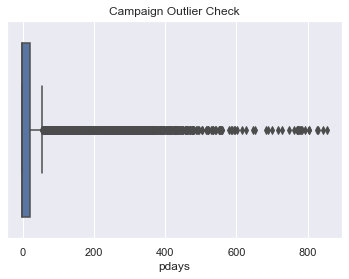

In [31]:
sns.boxplot(x=data1['pdays'])
plt.title('Campaign Outlier Check')
plt.show()

In [32]:
print("Maximum pdays:" ,data1['pdays'].max())
print("Minimum pdays:" ,data1['pdays'].min())
print("customer not contacted in perivious campaign:", len(data1[data1['pdays']== -1])/ len(data1))

Maximum pdays: 854
Minimum pdays: -1
customer not contacted in perivious campaign: 0.745744490234725


- By analyzing the pdays data, we find that a large number of customers 74.5% not contacted previously by bank.


- We consider, number of days that passed by after the client was last contacted from a previous campaign has no outliers because pdays range does not affect our current campaign.

### Outlier for Previous

<AxesSubplot:xlabel='previous', ylabel='Density'>

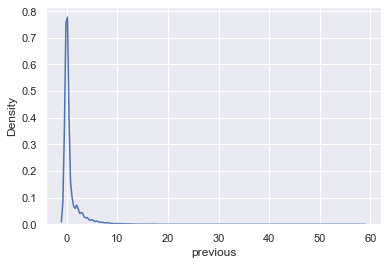

In [33]:
sns.kdeplot(data1['previous'])

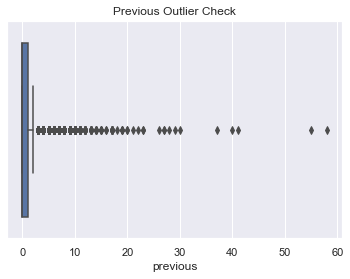

In [34]:
sns.boxplot(x=data1['previous'])
plt.title('Previous Outlier Check')
plt.show()

In [35]:
print("max:" ,data1['previous'].max())
print("previously not contected customer:", len(data1[data1['previous']==0])/len(data1))

max: 58
previously not contected customer: 0.745744490234725


In [38]:
## customers previous contact more than 30  are replaced with  30
data1['previous'] = np.where(data1['previous']>3, 3, data1['previous'])

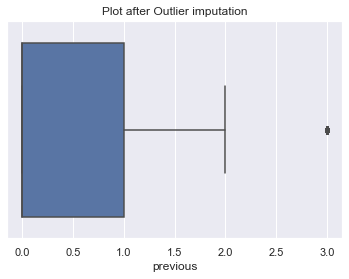

In [39]:
# After outliers imputation 
sns.boxplot(x=data1['previous'])
plt.title('Plot after Outlier imputation')
plt.show()

- By analyzing the previous data, we find that number of contacts performed before this campaign for particular customer should not be exceed 3. 


- Almost 75% customers were not previously contacted for loan.


### Descriptive Statistics

In [40]:
data2 = data1.copy()
data2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.152347,1528.538524,15.658036,371.993818,2.238577,51.330407,0.541749
std,11.659113,3225.413326,8.420740,347.128386,1.521158,108.758282,1.024083
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,74.500000,81204.000000,31.000000,3881.000000,6.000000,854.000000,3.000000


### Below conclusion can be done based on data summary:
- Maximum age is 74.5 and minimum age is 18.
 
 
- Minimum account balance of customer is in negative; it means some accounts are loan account and maximum balance is 81204.


- Maximum number of contacts performed during this campaign for particular customer is 6 and minimum contact is 1.


- Maximum number of days that passed by after the client was last contacted from a previous campaign is 854 and minimum days is -1, it means some customers are not contacted previously.


- A large number of customers were not contacted in previous campaign and maximum time contact a customer should be 3.


## 3.5 Univariate Analysis 

Univariate, in which we analyze date of just one variable. A variable in our dataset refers to a single feature/column.

### Analysis of deposit record of customers

no     5873
yes    5289
Name: deposit, dtype: int64
Yes deposit percentage: 47.38 %


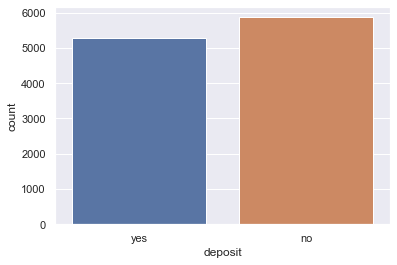

In [41]:
# count of deposit of customer
deposit_counts = data2['deposit'].value_counts()
print(deposit_counts)
print("Yes deposit percentage:", np.round((data2[data2['deposit']=='yes'].shape[0]/data2.shape[0])*100,2),"%")

# plot of customer deposit 
sns.countplot(data2.deposit)
plt.show()

- Customers deposit for "yes" is around 47.4%.


### Analysis last contact month of year

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


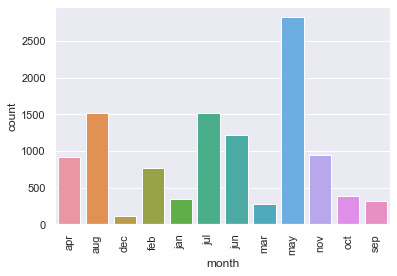

In [42]:
data3= data2.sort_values(['month'])
month_counts = data3['month'].value_counts()
print(month_counts)

# plot
sns.countplot(x='month', data= data3)
plt.xticks(rotation=90)
plt.show()

- By analyzing above figure, we can see that maximum customers were contacted (2824) in month of "may" and minimum contacted (110) in month of "dec". It means our previous campaign was most active during summer time.

### Communication Types

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


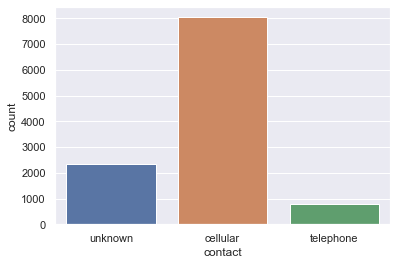

In [43]:
contact_counts = data2['contact'].value_counts()
print(contact_counts)

# plot
sns.countplot(x='contact', data= data2)
plt.show()

- 	Maximum customer prefers communication via cellular (8042) and minimum communication via telephone (774).

### Analysis of marital status of customers

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


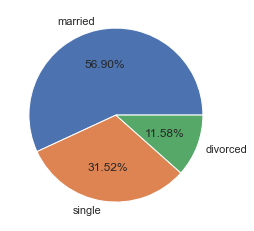

In [44]:
# count of marital status of customer
marital_counts = data2['marital'].value_counts()
print(marital_counts) 

plt.pie(data2['marital'].value_counts(), labels=data2['marital'].unique(), autopct='%1.2f%%')
plt.show()

- By analyzing the figure above, we can see that customer marital status has three categories (Single, Divorced, Married).


- Married customers are maximum (57%) and minimum customers are divorced (11.5%).

### Housing loan

no     5881
yes    5281
Name: housing, dtype: int64
yes precentage for house loan: 0.473


<AxesSubplot:xlabel='housing', ylabel='count'>

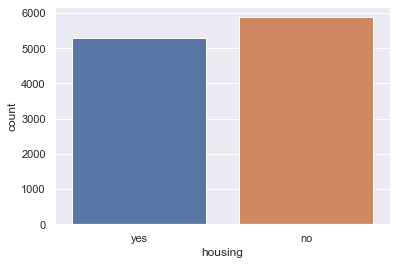

In [45]:
housing_loan_counts = data2['housing'].value_counts()
print(housing_loan_counts )
print("yes precentage for house loan:", np.round(data2[data2['housing']=='yes'].shape[0]/data2.shape[0],3))
sns.countplot(x='housing',data=data2)

- The positive deposit of customers for housing loan around 47.3%.

### Loan

no     9702
yes    1460
Name: loan, dtype: int64
yes precentage for loan: 0.131


<AxesSubplot:xlabel='loan', ylabel='count'>

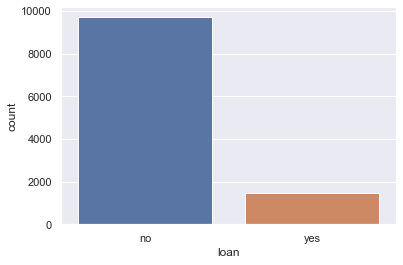

In [46]:
loan_counts = data2['loan'].value_counts()
print(loan_counts )
print("yes precentage for loan:", np.round(data2[data2['loan']=='yes'].shape[0]/data2.shape[0],3))
sns.countplot(x='loan',data=data2)

- Most of customers deposit "no" for personal loan and "yes" deposit percentage is 13%.

### Analysis of type of jobs of customers

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


<AxesSubplot:title={'center':'Job types of customers'}>

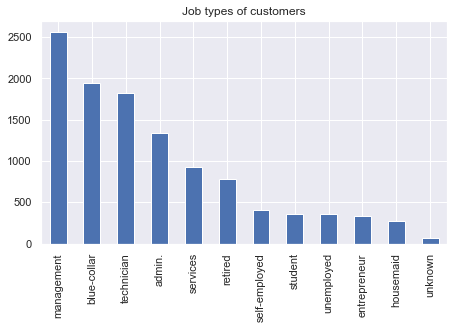

In [47]:
# count of job types of customer
job_counts = data2['job'].value_counts()
print(job_counts)
# Bar plot
plt.subplot(221)
data2['job'].value_counts().plot(kind='bar', title='Job types of customers',figsize=(16,9))

- Maximum customers have management jobs (2566) and some part of jobs types is unknown(70).


### Analysis of Poutcome

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


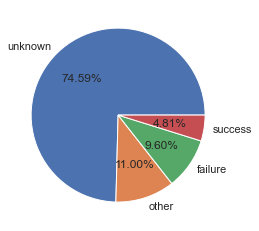

In [48]:
# count of previously targeted customer
poutcome_counts = data2['poutcome'].value_counts()
print(poutcome_counts) 

plt.pie(data2['poutcome'].value_counts(), labels=data2['poutcome'].unique(), autopct='%1.2f%%')
plt.show()

- By analyzing above graph, we find that outcome of the previous marketing campaign was not pretty good. As we can see that success rate is 4.8% which is very low.


- Almost 74.5% outcome is unknown and 9.5% campaign outcome is failure and 11% outcome goes for another category.

### Analysis of Default credit

no     10994
yes      168
Name: default, dtype: int64


<AxesSubplot:xlabel='default', ylabel='count'>

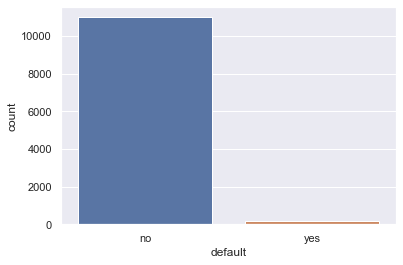

In [49]:
# count of job types of customer
job_counts = data2['default'].value_counts()
print(job_counts)
sns.countplot(x='default',data=data2)

- The count for default loan is less.


###  Analysis of customers education

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


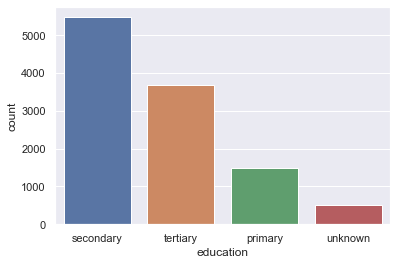

In [50]:
# count of education type of customers
education_counts = data2['education'].value_counts()
print(education_counts)
# plot of customer eduaction type
sns.countplot(data2.education)
plt.show()

- Maximum customers (5476) belong to secondary education category and some count of education type is unknown (497).


- Education type count decrease from secondary to primary.


### Distribution plots of numeric columns¶

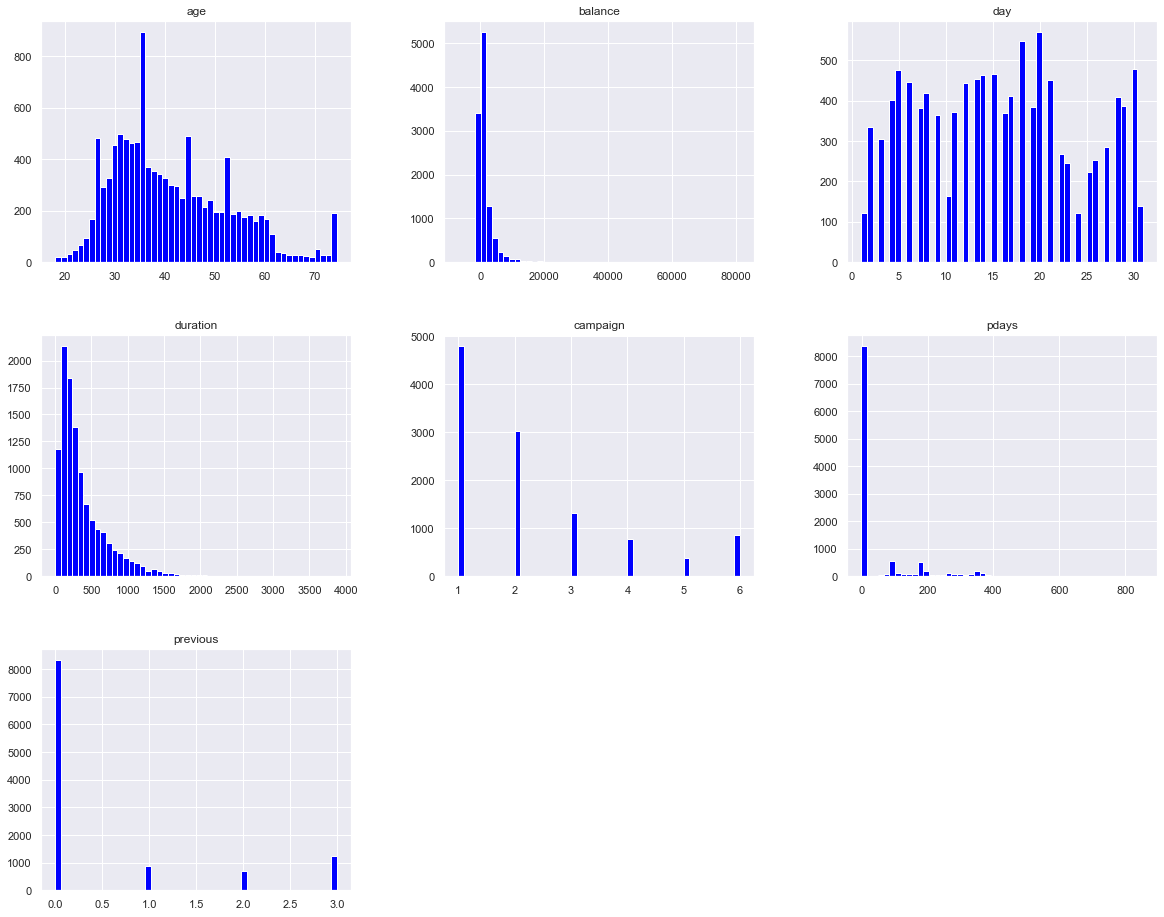

In [51]:
%matplotlib inline
data2.hist(bins = 50, figsize=(20,16), color = 'blue') 
plt.show()

## 3.6 Bivariate Analysis

### Comparision of job, education, marital and contact data with target variable "deposit"

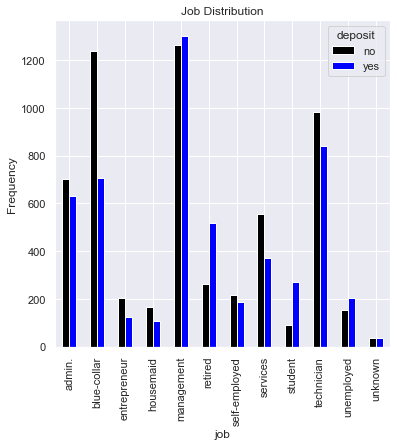

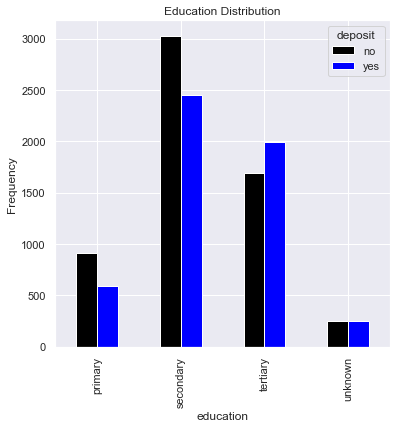

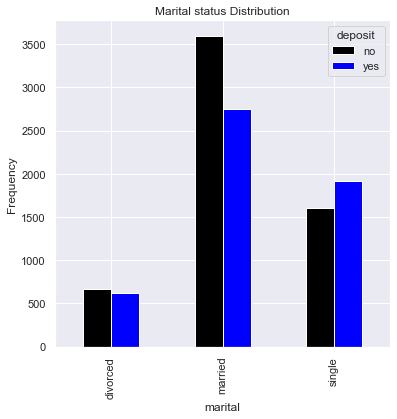

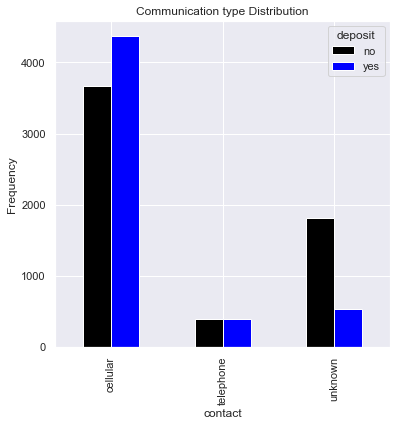

In [52]:
# job vs deposit 
pd.crosstab(data2.job,data2.deposit).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Job Distribution')
plt.ylabel('Frequency')
# education vs deposit
pd.crosstab(data2.education,data2.deposit).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Education Distribution')
plt.ylabel('Frequency')
# marital vs deposit
pd.crosstab(data2.marital,data2.deposit).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Marital status Distribution')
plt.ylabel('Frequency')
# contact vs deposit
pd.crosstab(data2.contact,data2.deposit).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Communication type Distribution')
plt.ylabel('Frequency')

plt.show()

### Comparision of housing loan, loan and default data with target variable "deposit"

Text(0, 0.5, 'Frequency')

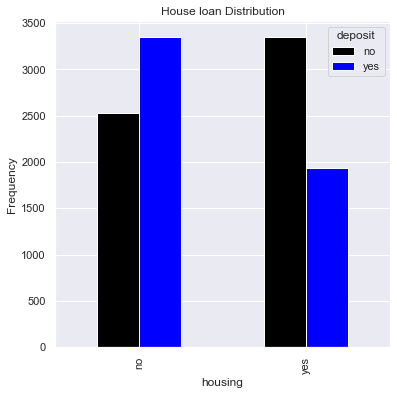

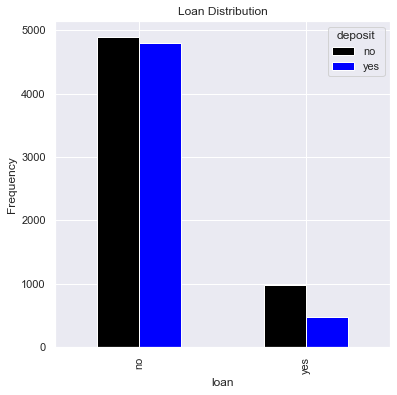

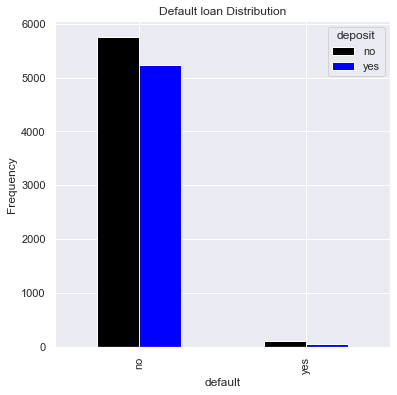

In [53]:
# housing vs deposit
pd.crosstab(data2.housing,data2.deposit).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('House loan Distribution')
plt.ylabel('Frequency')
# loan vs deposit
pd.crosstab(data2.loan,data2.deposit).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Loan Distribution')
plt.ylabel('Frequency')
# default vs deposit
pd.crosstab(data2.default,data2.deposit).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Default loan Distribution')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

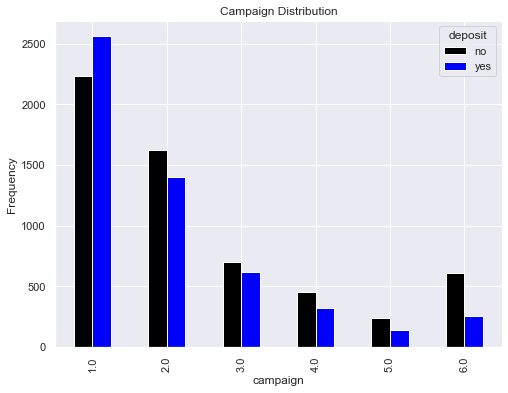

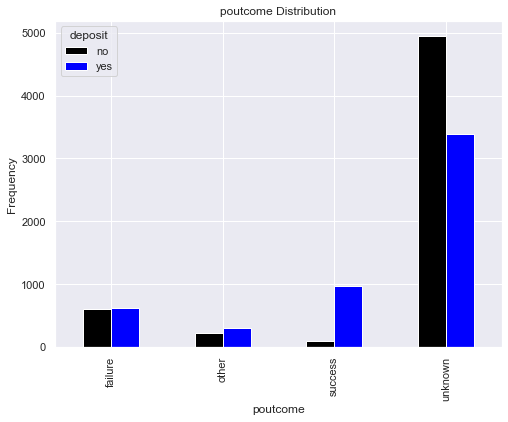

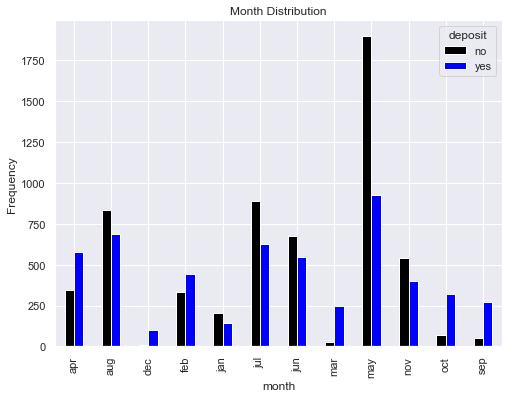

In [54]:
# campaign vs deposit
pd.crosstab(data2.campaign,data2.deposit).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('Campaign Distribution')
plt.ylabel('Frequency')
# poutcome vs deposit
pd.crosstab(data2.poutcome,data2.deposit).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('poutcome Distribution')
plt.ylabel('Frequency')
# month vs deposit
pd.crosstab(data2.month,data2.deposit).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('Month Distribution')
plt.ylabel('Frequency')

In [55]:
a1 = data2[(data2['month']=='may')]['deposit'].value_counts()
print("Yes deposit percentage for may month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='mar')]['deposit'].value_counts()
print("Yes deposit percentage for march month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='oct')]['deposit'].value_counts()
print("Yes deposit percentage for october month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='sep')]['deposit'].value_counts()
print("Yes deposit percentage for september month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='aug')]['deposit'].value_counts()
print("Yes deposit percentage for august month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))



Yes deposit percentage for may month:  32.755
Yes deposit percentage for march month:  89.8551
Yes deposit percentage for october month:  82.398
Yes deposit percentage for september month:  84.326
Yes deposit percentage for august month:  45.293


### Comparision of call duration with target variable "deposit"

In [56]:
# Create bins for duration
data2['duration_bins_sec'] = pd.cut(x=data2['duration'], bins=[0,60,180,300,600,1200,4918])
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,duration_bins_sec
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1.0,-1,0,unknown,yes,"(600, 1200]"
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1.0,-1,0,unknown,yes,"(1200, 4918]"
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1.0,-1,0,unknown,yes,"(1200, 4918]"
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1.0,-1,0,unknown,yes,"(300, 600]"
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2.0,-1,0,unknown,yes,"(600, 1200]"


In [57]:
a1 = data2[(data2['duration']>0)&(data2['duration']<60)]['deposit'].value_counts()
print("Yes deposit percentage for 0-60 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>60)&(data2['duration']<180)]['deposit'].value_counts()
print("Yes deposit percentage for 60-180 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>180)&(data2['duration']<300)]['deposit'].value_counts()
print("Yes deposit percentage for 180-300 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>300)&(data2['duration']<600)]['deposit'].value_counts()
print("Yes deposit percentage for 300-600 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>600)&(data2['duration']<1200)]['deposit'].value_counts()
print("Yes deposit percentage for 600-1200 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>1200)]['deposit'].value_counts()
print("Yes deposit percentage for 1200 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

Yes deposit percentage for 0-60 sec duration:  1.2587
Yes deposit percentage for 60-180 sec duration:  21.72
Yes deposit percentage for 180-300 sec duration:  46.0298
Yes deposit percentage for 300-600 sec duration:  61.5414
Yes deposit percentage for 600-1200 sec duration:  83.9074
Yes deposit percentage for 1200 sec duration:  91.0526


Text(0, 0.5, 'Frequency')

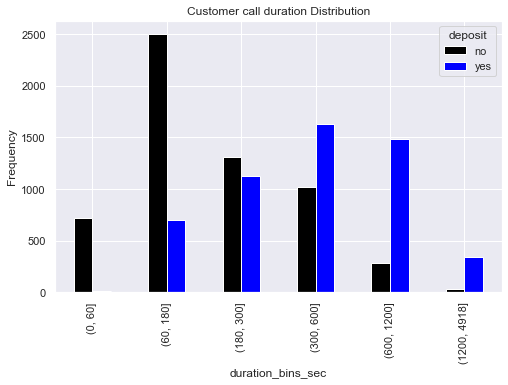

In [58]:
pd.crosstab(data2.duration_bins_sec,data2.deposit).plot(kind="bar",figsize=(8,5),color=['black','blue'])
plt.title('Customer call duration Distribution')
plt.ylabel('Frequency')

### Comparision age of customers with target variable "deposit"

In [59]:
# Create bins for age column
data2['age_bins']=pd.cut(x=data2['age'], bins=[18,30,40,50,70.5])
data2['age_by_decad'] = pd.cut(x=data2['age'], bins=[18,30,40,50,70.5], labels=['30s', '40s', '50s','70s'])
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,duration_bins_sec,age_bins,age_by_decad
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1.0,-1,0,unknown,yes,"(600, 1200]","(50.0, 70.5]",70s
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1.0,-1,0,unknown,yes,"(1200, 4918]","(50.0, 70.5]",70s
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1.0,-1,0,unknown,yes,"(1200, 4918]","(40.0, 50.0]",50s
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1.0,-1,0,unknown,yes,"(300, 600]","(50.0, 70.5]",70s
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2.0,-1,0,unknown,yes,"(600, 1200]","(50.0, 70.5]",70s


Text(0, 0.5, 'Frequency')

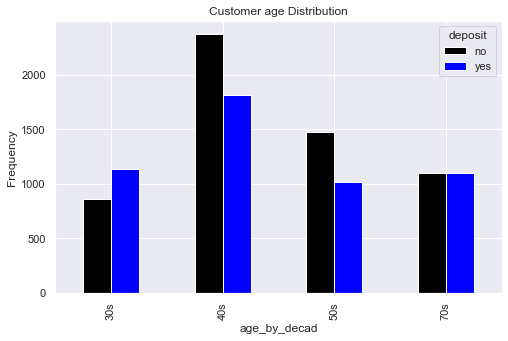

In [60]:
pd.crosstab(data2.age_by_decad,data2.deposit).plot(kind="bar",figsize=(8,5),color=['black','blue'])
plt.title('Customer age Distribution')
plt.ylabel('Frequency')

In [61]:
a1 = data2[(data2['age']>18)&(data2['age']<30)]['deposit'].value_counts()
print("Yes deposit percentage for 18-30 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>30)&(data2['age']<40)]['deposit'].value_counts()
print("Yes deposit percentage for 30-40 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>40)&(data2['age']<50)]['deposit'].value_counts()
print("Yes deposit percentage for 40-50 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>50)&(data2['age']<70.5)]['deposit'].value_counts()
print("Yes deposit percentage for 50-70.5 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

Yes deposit percentage for 18-30 age:  59.6889
Yes deposit percentage for 30-40 age:  43.9151
Yes deposit percentage for 40-50 age:  41.1381
Yes deposit percentage for 50-70.5 age:  49.818


## 3.7 Correlation Matrix

- A heat map is a two-dimensional representation of data in which values are represented by colors which provides a visual summary of information.


- Heat map work with only numerical values.

<AxesSubplot:>

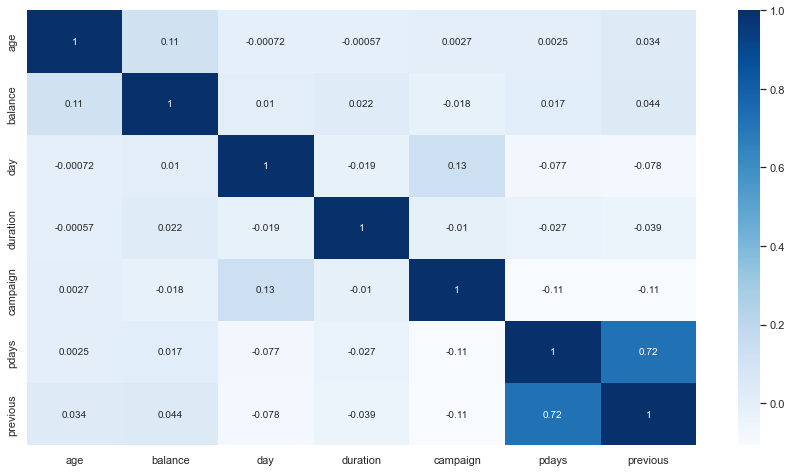

In [62]:
plt.figure(figsize=[15,8])
sns.heatmap(data2.corr(),annot=True,cmap="Blues")

# 4. Conclusion 

The analysis are the recommendations for future marketing campaigns:
    
- Future campaigns should be targeted on customers from age categories below 30 years old and above 50 years old. Student and Senior citizen are more responded.


- The number of contacts with the customer shouldn't exceed 3.


- Mode of contact should be cellular and telephone.


- The month of highest level of marketing activity was the month of May. But high deposit rate of customers is in (March, September and October). Campaign highly active in summer time. So, for future campaign marketing activity should be increase in winter season.


- Call duration highly effect the deposit rate. Deposit rate and call duration is directly proportional. So, when increase call duration deposit rate also increase.


- Married people have more positive responses for deposit.


- House loan demanding is more in customer’s than personal loan. People who preferred housing loan and not default are best to target.


- People who have management, technician and blue-collar related jobs are best to target.


- People who have completed their secondary education respond more for deposit. Students come under this category most.

